In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Adding column names & converting the file to csv format
df = pd.read_csv("D:\\Cipher\\adult.data.txt",delimiter=',', names = ["Age" , "Workclass" , "ID" , "Education" ,
                                                                      "Education_num" , "Marital_Status", 
                                                                      "Occupation" , "Relationship" , "Race" , 
                                                                      "Sex" , "Capital_Gain" , "Capital_Loss" ,
                                                                      "Hrs_per_week" , "Country" , "Target" ])
df.to_csv('adult.csv')

In [3]:
#data pre-processing
df.isin(['?']).sum(axis=0)   
df = df.replace(to_replace = ' ?', value = np.nan)

#Checking for the number of missing values in each column
df.isnull().sum()  

#dropping all the nan rows
df.dropna(how='any',inplace=True)

In [4]:
#Checking the ratio of output variables
print(df['Target'].value_counts(sort=False)[1] / (df['Target'].value_counts(sort=False)[1] + df['Target'].value_counts(sort=False)[0]))
print(df['Target'].value_counts(sort=False)[0] / (df['Target'].value_counts(sort=False)[1] + df['Target'].value_counts(sort=False)[0]))

0.24892248524633645
0.7510775147536636


In [5]:
#Encoding the target variable, Since there are binary outputs    
label_encod = LabelEncoder()
df['Target'] = label_encod.fit_transform(df['Target'])

#Encoding the gender variable
label_encod = LabelEncoder()
df['Sex'] = label_encod.fit_transform(df['Sex'])

In [6]:
#Feature Selection
for column in df:
    print(df[column].value_counts())

36    852
31    851
33    837
34    836
35    828
     ... 
82      7
83      5
88      3
85      3
86      1
Name: Age, Length: 72, dtype: int64
 Private             22286
 Self-emp-not-inc     2499
 Local-gov            2067
 State-gov            1279
 Self-emp-inc         1074
 Federal-gov           943
 Without-pay            14
Name: Workclass, dtype: int64
203488    13
113364    12
164190    12
123011    12
148995    12
          ..
34393      1
288341     1
239415     1
118352     1
229376     1
Name: ID, Length: 20263, dtype: int64
 HS-grad         9840
 Some-college    6678
 Bachelors       5044
 Masters         1627
 Assoc-voc       1307
 11th            1048
 Assoc-acdm      1008
 10th             820
 7th-8th          557
 Prof-school      542
 9th              455
 12th             377
 Doctorate        375
 5th-6th          288
 1st-4th          151
 Preschool         45
Name: Education, dtype: int64
9     9840
10    6678
13    5044
14    1627
11    1307
7     1048
12    

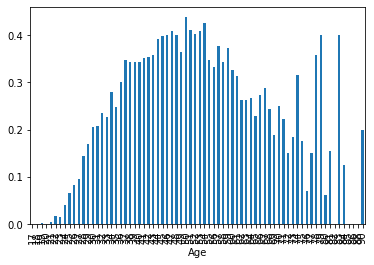

In [7]:
#Plotting a bar graph to check and filter redundant variables from the dataset
df.groupby('Age').Target.mean().plot(kind='bar')

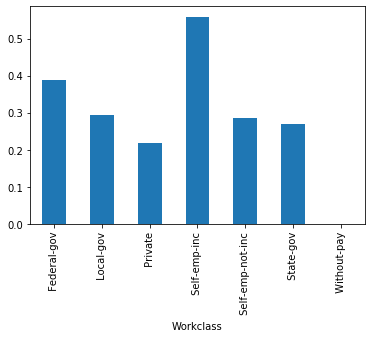

In [8]:
df.groupby('Workclass').Target.mean().plot(kind='bar')

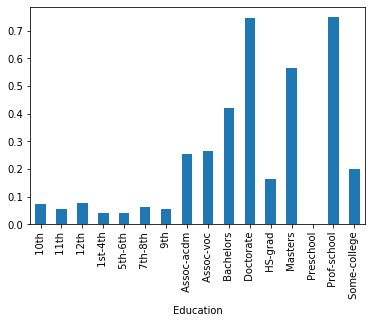

In [9]:
df.groupby('Education').Target.mean().plot(kind='bar')

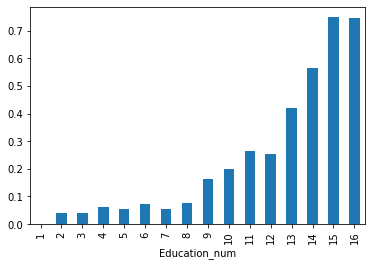

In [10]:
df.groupby('Education_num').Target.mean().plot(kind='bar')

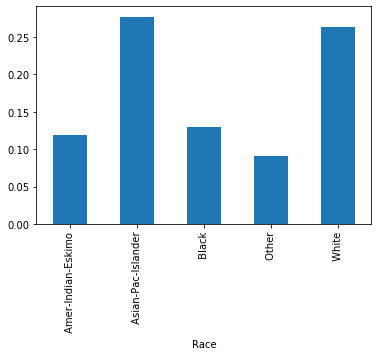

In [11]:
df.groupby('Race').Target.mean().plot(kind='bar')

In [12]:
#Dropping all the redundant columns containing noisy data
df = df.drop(['ID', 'Occupation', 'Country' , 'Capital_Loss' , 'Capital_Gain' , 'Hrs_per_week' , 'Age'] , axis = 1)

In [13]:
#Converting categorical data to numerical data

df['Workclass'] = df['Workclass'].map({' Self-emp-inc': 0, ' State-gov': 1,' Federal-gov': 2, ' Without-pay': 3, ' Local-gov': 4,' Private': 5, ' Self-emp-not-inc': 6}).astype(int)

df['Race'] = df['Race'].map({' Black': 0, ' Asian-Pac-Islander': 1,' Other': 2, ' White': 3, ' Amer-Indian-Eskimo': 4}).astype(int)

df['Education'] = df['Education'].map({' Some-college': 0 , ' Preschool': 1 , ' 5th-6th': 2 , ' HS-grad': 3 , ' Masters': 4 , ' 12th': 5 , ' 7th-8th': 6, ' Prof-school': 7 ,' 1st-4th': 8, ' Assoc-acdm': 9, ' Doctorate': 10, ' 11th': 11 ,' Bachelors': 12, ' 10th': 13,' Assoc-voc': 14 ,' 9th': 15}).astype(int)

df['Relationship'] = df['Relationship'].map({' Not-in-family': 0 , ' Wife': 1 , ' Other-relative': 2, ' Unmarried': 3 ,' Husband': 4 ,' Own-child': 5}).astype(int)

df['Marital_Status'] = df['Marital_Status'].map({' Married-spouse-absent': 0 , ' Widowed': 1 , ' Married-civ-spouse': 2 , ' Separated': 3 , ' Divorced': 4 ,' Never-married': 5 , ' Married-AF-spouse': 6}).astype(int)


In [14]:
X = df.drop('Target' , axis = 1)
Y = df['Target']

In [15]:
#Checking the K best features from the dataset
bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
scores = pd.concat([dfcolumns,dfscores],axis=1)
scores.columns = ['specs','score']
print(scores.nlargest(5,'score'))

            specs        score
3  Marital_Status  2651.061720
2   Education_num  2178.306167
1       Education  1706.326426
4    Relationship   677.007887
6             Sex   459.346270


In [16]:
#Splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression

Confusion matrix:
 [[4198  334]
 [ 839  662]]

Accuracy Score: 80.55693684733963
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      4532
           1       0.66      0.44      0.53      1501

    accuracy                           0.81      6033
   macro avg       0.75      0.68      0.70      6033
weighted avg       0.79      0.81      0.79      6033



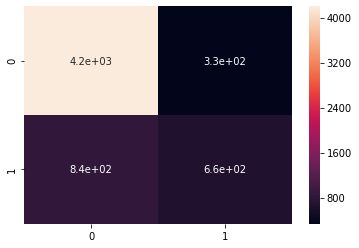

In [17]:
#Applying Logistic Regression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
print("Logistic Regression")
CM = confusion_matrix(y_test, y_pred)
CR = classification_report(y_test, y_pred)
AC = accuracy_score(y_test, y_pred)
print()
print("Confusion matrix:\n" , CM )
print()
sns.heatmap(CM, annot = True)
print("Accuracy Score:", (AC)*100)
print("Classification Report:\n", CR)

Naive Bayes

Confusion matrix:
 [[3394 1138]
 [ 419 1082]]

Accuracy Score: 74.19194430631526
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      4532
           1       0.49      0.72      0.58      1501

    accuracy                           0.74      6033
   macro avg       0.69      0.73      0.70      6033
weighted avg       0.79      0.74      0.76      6033



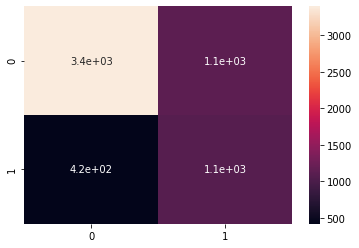

In [18]:
#Applying Naive Bayes
model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Naive Bayes")
CM = confusion_matrix(y_test, y_pred)
CR = classification_report(y_test, y_pred)
AC = accuracy_score(y_test, y_pred)
print()
print("Confusion matrix:\n" , CM )
print()
sns.heatmap(CM, annot = True)
print("Accuracy Score:", (AC)*100)
print("Classification Report:\n", CR)

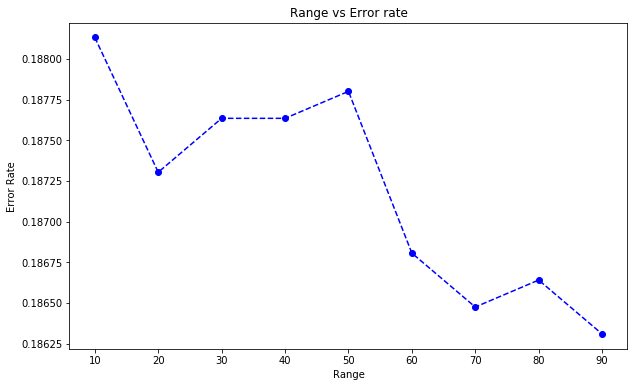

In [19]:
#Applying Random Forest Classifier & checking the optimal n_estimator which provides an accurate response
error_rate = []
for i in range(10,100,10):
    RFC = RandomForestClassifier(n_estimators = i, random_state = 0 )
    RFC.fit(X_train, y_train)
    pred = RFC.predict(X_test)
    error_rate.append(np.mean(pred != y_test))

#Plotting the range vs error_rate graph which specifies at what value, the error is minimum
plt.figure(figsize = (10,6))
plt.plot(range(10,100,10), error_rate, linestyle = 'dashed', color = 'blue', marker = 'o')
plt.title("Range vs Error rate")
plt.xlabel("Range")
plt.ylabel("Error Rate")
plt.show()

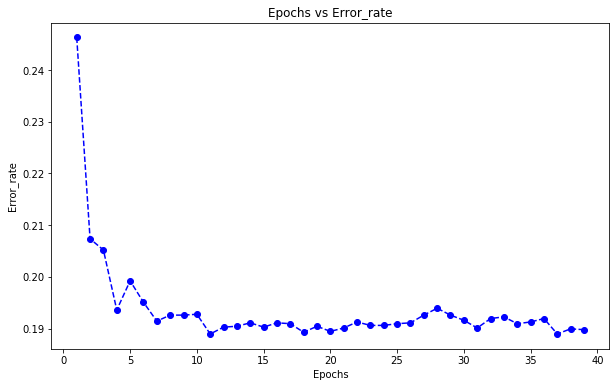

In [21]:
#Applying KNN & checking the optimal number of neighbours which gives a minimum error rate
error_rate = []
for k in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred != y_test))


plt.figure(figsize = (10,6))
plt.plot(range(1,40), error_rate, linestyle = 'dashed', color = 'blue', marker = 'o')
plt.title("Epochs vs Error_rate")
plt.xlabel("Epochs")
plt.ylabel("Error_rate")
plt.show()